In [1]:
import pandas as pd

In [2]:
baseline=0.82747

In [3]:
df=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='original'
)
df.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df['baseline']=baseline

In [4]:
df

,model,agg,audio,scene,place,object,liwc,baseline
0,rf,TB,0.82296,0.82840,0.82295,0.82468,0.827340,0.82747
1,rf,S,0.82601,0.82999,0.82800,0.82787,0.827207,0.82747
2,lr,F,0.82747,0.82721,0.82761,0.82880,0.815130,0.82747
3,lr,TB,0.82747,0.82747,0.78698,0.82747,0.824150,0.82747
4,lr,S,0.82721,0.82747,0.82867,0.79245,0.819507,0.82747
5,kn,F,0.82747,0.82694,0.82734,0.82641,0.827470,0.82747
6,kn,TB,0.82734,0.82707,0.82747,0.82721,0.827470,0.82747
7,kn,S,0.81885,0.82760,0.82747,0.82575,0.827870,0.82747


In [45]:
def uplift_base_line(
    val,
    baseline
):
    return (val-baseline)/baseline


In [34]:
df.assign(
    uplift_scene=lambda x:x.apply(
        lambda y: uplift_base_line(y.scene,y.baseline),axis=1
    )
).assign(
    uplift_audio=lambda x:x.apply(
        lambda y: uplift_base_line(y.audio,y.baseline),axis=1
    )
).assign(
    uplift_object=lambda x:x.apply(
        lambda y: uplift_base_line(y.object,y.baseline),axis=1
    )
).assign(
    uplift_place=lambda x:x.apply(
        lambda y: uplift_base_line(y.place,y.baseline),axis=1
    )
).assign(
    uplift_liwc=lambda x:x.apply(
        lambda y: uplift_base_line(y.liwc,y.baseline),axis=1
    )
)[['uplift_liwc','uplift_scene','uplift_place','uplift_object','uplift_audio']].mean()

uplift_liwc     -0.003568
uplift_scene     0.000361
uplift_place    -0.006536
uplift_object   -0.005910
uplift_audio    -0.002263
dtype: float64

In [65]:
val=df.pivot_table(
    index='model',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

model
kn   -0.000993
lr   -0.007814
rf   -0.001123
dtype: float64

In [73]:
val=df.pivot_table(
    index='agg',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

agg
F    -0.001634
S    -0.001362
TB   -0.002244
dtype: float64

In [70]:
df=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='top10'
)
df.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df['baseline']=baseline

In [71]:
df.assign(
    uplift_scene=lambda x:x.apply(
        lambda y: uplift_base_line(y.scene,y.baseline),axis=1
    )
).assign(
    uplift_audio=lambda x:x.apply(
        lambda y: uplift_base_line(y.audio,y.baseline),axis=1
    )
).assign(
    uplift_object=lambda x:x.apply(
        lambda y: uplift_base_line(y.object,y.baseline),axis=1
    )
).assign(
    uplift_place=lambda x:x.apply(
        lambda y: uplift_base_line(y.place,y.baseline),axis=1
    )
).assign(
    uplift_liwc=lambda x:x.apply(
        lambda y: uplift_base_line(y.liwc,y.baseline),axis=1
    )
)[['uplift_liwc','uplift_scene','uplift_place','uplift_object','uplift_audio']].mean()

uplift_liwc     -0.005001
uplift_scene     0.000128
uplift_place    -0.000865
uplift_object   -0.002405
uplift_audio    -0.000703
dtype: float64

In [72]:
val=df.pivot_table(
    index='model',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

model
lr   -0.002360
rf   -0.000882
dtype: float64

In [74]:
val=df.pivot_table(
    index='agg',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

agg
F    -0.001634
S    -0.001362
TB   -0.002244
dtype: float64

In [78]:
baseline=0.5

In [79]:
df=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='under_sampling'
)
df.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df['baseline']=baseline

In [80]:
df.assign(
    uplift_scene=lambda x:x.apply(
        lambda y: uplift_base_line(y.scene,y.baseline),axis=1
    )
).assign(
    uplift_audio=lambda x:x.apply(
        lambda y: uplift_base_line(y.audio,y.baseline),axis=1
    )
).assign(
    uplift_object=lambda x:x.apply(
        lambda y: uplift_base_line(y.object,y.baseline),axis=1
    )
).assign(
    uplift_place=lambda x:x.apply(
        lambda y: uplift_base_line(y.place,y.baseline),axis=1
    )
).assign(
    uplift_liwc=lambda x:x.apply(
        lambda y: uplift_base_line(y.liwc,y.baseline),axis=1
    )
)[['uplift_liwc','uplift_scene','uplift_place','uplift_object','uplift_audio']].mean()

uplift_liwc      0.284712
uplift_scene     0.235192
uplift_place     0.186540
uplift_object    0.207210
uplift_audio     0.239618
dtype: float64

In [81]:
val=df.pivot_table(
    index='model',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

model
kn    0.229591
lr    0.208615
rf    0.265309
dtype: float64

In [82]:
val=df.pivot_table(
    index='agg',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

agg
F     0.244614
S     0.213847
TB    0.238155
dtype: float64

In [83]:
df=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='over_sampling'
)
df.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df['baseline']=baseline

In [84]:
df.assign(
    uplift_scene=lambda x:x.apply(
        lambda y: uplift_base_line(y.scene,y.baseline),axis=1
    )
).assign(
    uplift_audio=lambda x:x.apply(
        lambda y: uplift_base_line(y.audio,y.baseline),axis=1
    )
).assign(
    uplift_object=lambda x:x.apply(
        lambda y: uplift_base_line(y.object,y.baseline),axis=1
    )
).assign(
    uplift_place=lambda x:x.apply(
        lambda y: uplift_base_line(y.place,y.baseline),axis=1
    )
).assign(
    uplift_liwc=lambda x:x.apply(
        lambda y: uplift_base_line(y.liwc,y.baseline),axis=1
    )
)[['uplift_liwc','uplift_scene','uplift_place','uplift_object','uplift_audio']].mean()

uplift_liwc      0.285690
uplift_scene     0.212237
uplift_place     0.170433
uplift_object    0.227025
uplift_audio     0.235040
dtype: float64

In [85]:
val=df.pivot_table(
    index='model',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

model
kn    0.219652
lr    0.236879
rf    0.219544
dtype: float64

In [86]:
val=df.pivot_table(
    index='agg',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-baseline)/baseline

agg
F     0.251578
S     0.228691
TB    0.206484
dtype: float64

In [89]:
def analysis(type='original'):
    if type in ['original','top10']:
        baseline=0.82747
    else:
         baseline=.5
    df=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='{}'.format(type)
    )
    df.columns=[
        'model',
        'agg',
        'audio',
        'scene',
        'place',
        'object',
        'liwc'
    ]
    df['baseline']=baseline
    
    uplift_feature=df.assign(
        uplift_scene=lambda x:x.apply(
            lambda y: uplift_base_line(y.scene,y.baseline),axis=1
        )
    ).assign(
        uplift_audio=lambda x:x.apply(
            lambda y: uplift_base_line(y.audio,y.baseline),axis=1
        )
    ).assign(
        uplift_object=lambda x:x.apply(
            lambda y: uplift_base_line(y.object,y.baseline),axis=1
        )
    ).assign(
        uplift_place=lambda x:x.apply(
            lambda y: uplift_base_line(y.place,y.baseline),axis=1
        )
    ).assign(
        uplift_liwc=lambda x:x.apply(
            lambda y: uplift_base_line(y.liwc,y.baseline),axis=1
        )
    )[['uplift_liwc','uplift_scene','uplift_place','uplift_object','uplift_audio']].mean()
    
    val_model=df.pivot_table(
        index='model',
        aggfunc='mean',
        values=['audio','object','scene','place','liwc']
    ).mean(axis=1)
    uplift_model=(val_model-baseline)/baseline
    
    val_agg=df.pivot_table(
        index='agg',
        aggfunc='mean',
        values=['audio','object','scene','place','liwc']
    ).mean(axis=1)
    uplift_agg=(val_agg-baseline)/baseline
    
    return  uplift_feature,uplift_model,uplift_agg
        

In [93]:
analysis('original')

(uplift_liwc     -0.003568
 uplift_scene     0.000361
 uplift_place    -0.006536
 uplift_object   -0.005910
 uplift_audio    -0.002263
 dtype: float64,
 model
 kn   -0.000993
 lr   -0.007814
 rf   -0.001123
 dtype: float64,
 agg
 F    -0.001553
 S    -0.004038
 TB   -0.004481
 dtype: float64)

In [94]:
analysis('top10')

(uplift_liwc     -0.005001
 uplift_scene     0.000128
 uplift_place    -0.000865
 uplift_object   -0.002405
 uplift_audio    -0.000703
 dtype: float64,
 model
 lr   -0.002360
 rf   -0.000882
 dtype: float64,
 agg
 F    -0.001634
 S    -0.001362
 TB   -0.002244
 dtype: float64)

In [91]:
analysis('under_sampling')

(uplift_liwc      0.284712
 uplift_scene     0.235192
 uplift_place     0.186540
 uplift_object    0.207210
 uplift_audio     0.239618
 dtype: float64,
 model
 kn    0.229591
 lr    0.208615
 rf    0.265309
 dtype: float64,
 agg
 F     0.244614
 S     0.213847
 TB    0.238155
 dtype: float64)

In [92]:
analysis('over_sampling')

(uplift_liwc      0.285690
 uplift_scene     0.212237
 uplift_place     0.170433
 uplift_object    0.227025
 uplift_audio     0.235040
 dtype: float64,
 model
 kn    0.219652
 lr    0.236879
 rf    0.219544
 dtype: float64,
 agg
 F     0.251578
 S     0.228691
 TB    0.206484
 dtype: float64)

In [114]:
df1=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='original'
)
df1.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df1['baseline']=0.82747
df1['resample']=False

In [115]:
df2=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='top10'
)
df2.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df2['baseline']=baseline
df2['resample']=False

In [5]:
df3=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='over_sampling'
)
df3.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df3['baseline']=.5
df3['resample']=True

In [10]:
df4=pd.read_excel(
    "/Users/loc_nguyen/Downloads/Book2.xlsx",sheet_name='under_sampling'
)
df4.columns=[
    'model',
    'agg',
    'audio',
    'scene',
    'place',
    'object',
    'liwc'
]
df4['baseline']=.5
df4['resample']=False

In [11]:
df_combine=pd.concat([df3,df4])
# df_combine=pd.concat([df1,df2,df3,df4])

In [12]:
val=df_combine.pivot_table(
    index='model',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-.5)/.5

model
kn    0.224622
lr    0.222747
rf    0.242427
dtype: float64

In [8]:
val=df_combine.pivot_table(
    index='agg',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-.5)/.5

agg
F     0.248096
S     0.221269
TB    0.222319
dtype: float64

In [14]:
val=df_combine.pivot_table(
    index='resample',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)
(val-pd.Series([0.5,.5]))/pd.Series([0.5,.5])

resample
False    0.230654
True     0.226085
dtype: float64

In [123]:
df_combine.pivot_table(
    index='resample',
    aggfunc='mean',
    values=['audio','object','scene','place','liwc']
).mean(axis=1)

resample
False    0.825082
True     0.614185
dtype: float64

In [16]:
import matplotlib.pyplot as plt

In [17]:
a=[1,.89,.8,.76,.64,.55,.5]

Text(0, 0.5, 'Average cross cosine similarity')

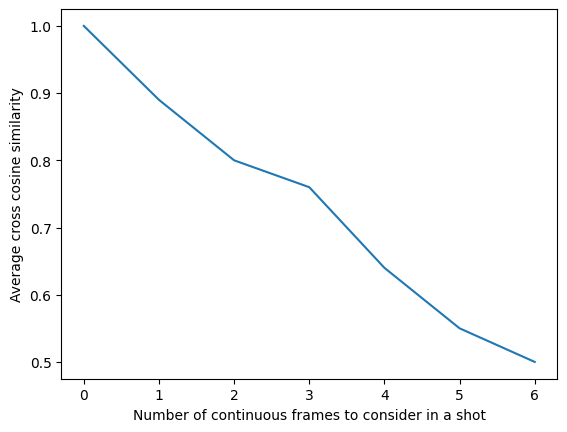

In [19]:
plt.plot(a)
plt.xlabel('Number of continuous frames to consider in a shot')
plt.ylabel('Average cross cosine similarity')